# 1 京东大数据分析

In [5]:
# 导入数据包
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# 导入数据
df1= pd.read_excel('./data/advertisement.xlsx')
df2= pd.read_excel('./data/sale.xlsx')

In [7]:
#数据处理
df1['投放日期'] = pd.to_datetime(df1['投放日期'])
df1= df1.set_index('投放日期',drop=True)
df2=df2[['日期','销售码洋']]
df2['日期'] = pd.to_datetime(df2['日期'])
df2= df2.set_index('日期',drop=True)

In [8]:
df1= pd.read_excel('./data/advertisement.xlsx')
df2= pd.read_excel('./data/sale.xlsx')

In [9]:
df1['投放日期'] = pd.to_datetime(df1['投放日期'])
df1= df1.set_index('投放日期',drop=True)
df2=df2[['日期','销售码洋']]
df2['日期'] = pd.to_datetime(df2['日期'])
df2= df2.set_index('日期',drop=True)

In [10]:
# 按月统计金额
df_x=df1.resample('M').sum().to_period('M')
df_y=df2.resample('M').sum().to_period('M')

## 1.1 京东电商销售收入与广告费分析散点图

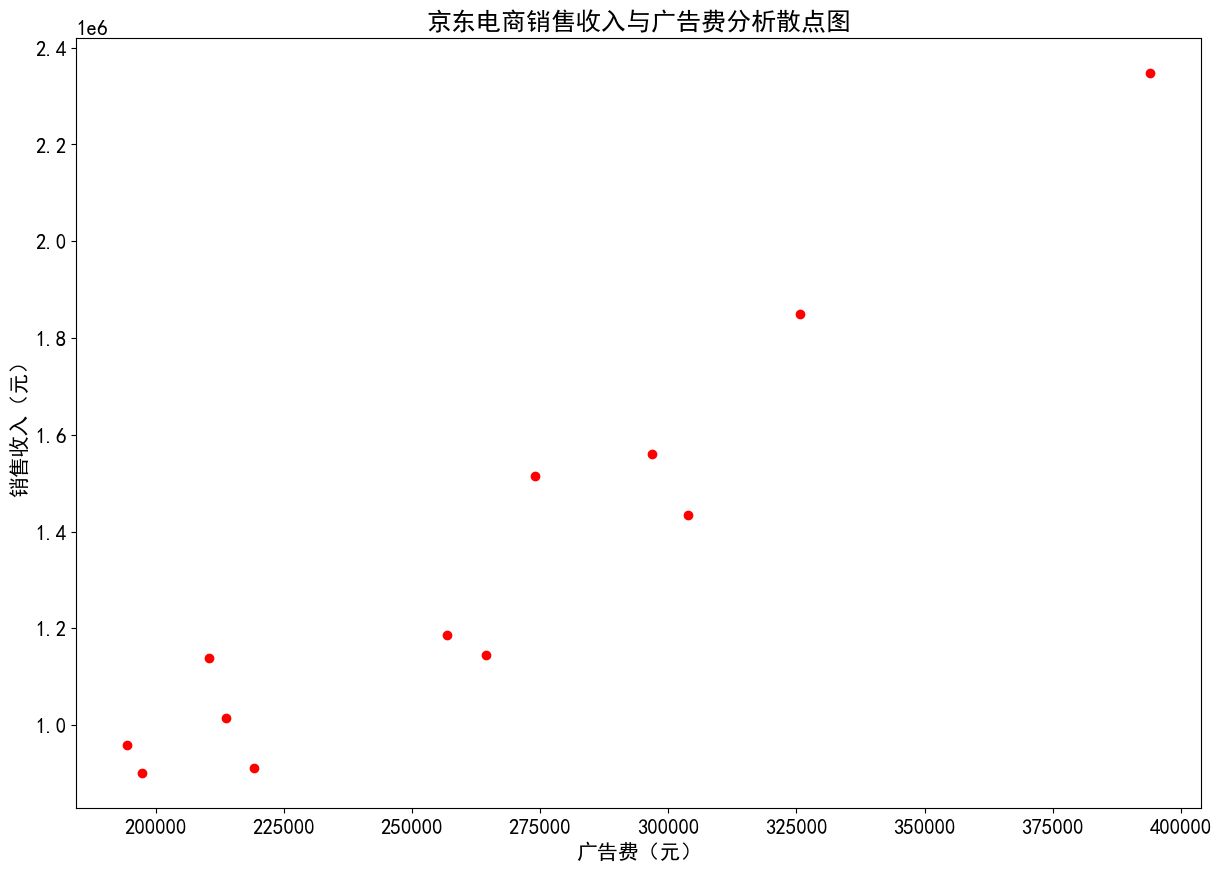

In [11]:
#x为广告费，y为销售收入
x=pd.DataFrame(df_x['支出'])
y=pd.DataFrame(df_y['销售码洋'])
# 图表字体为黑体，字号为11
plt.rc('font', family='SimHei',size=15)
plt.figure(figsize=(15,10))
plt.title("京东电商销售收入与广告费分析散点图")
plt.scatter(x, y,color='r')     #真实值散点图
plt.xlabel(u'广告费（元）')
plt.ylabel(u'销售收入（元）')
plt.subplots_adjust(left=0.15)  #图表距画布右侧之间的空白
plt.show()

In [12]:
#按月统计金额
df_x=df1.resample('M').sum().to_period('M')
df_y=df2.resample('M').sum().to_period('M')

In [13]:
clf=linear_model.LinearRegression()   #创建线性模型

In [14]:
#x为广告费，y为销售收入
x=pd.DataFrame(df_x['支出'])
y=pd.DataFrame(df_y['销售码洋'])
clf.fit(x,y) #拟合线性模型
k=clf.coef_  #获取回归系数
b=clf.intercept_ #获取截距

In [15]:
#未来6个月计划投入的广告费
x0=np.array([120000,130000,150000,180000,200000,250000])
x0=x0.reshape(6,1)    #数组重塑

In [16]:
#预测未来6个月的销售收入（y0）
y0=clf.predict(x0)
print('预测销售收入：')
print(y0)

预测销售收入：
[[ 343161.02820353]
 [ 412384.58984301]
 [ 550831.71312199]
 [ 758502.39804046]
 [ 896949.52131943]
 [1243067.32951688]]


E:\Anaconda3\envs\dasci\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
#使用线性模型预测y值
y_pred =clf.predict(x)

## 1.2 京东电商销售数据分析与预测

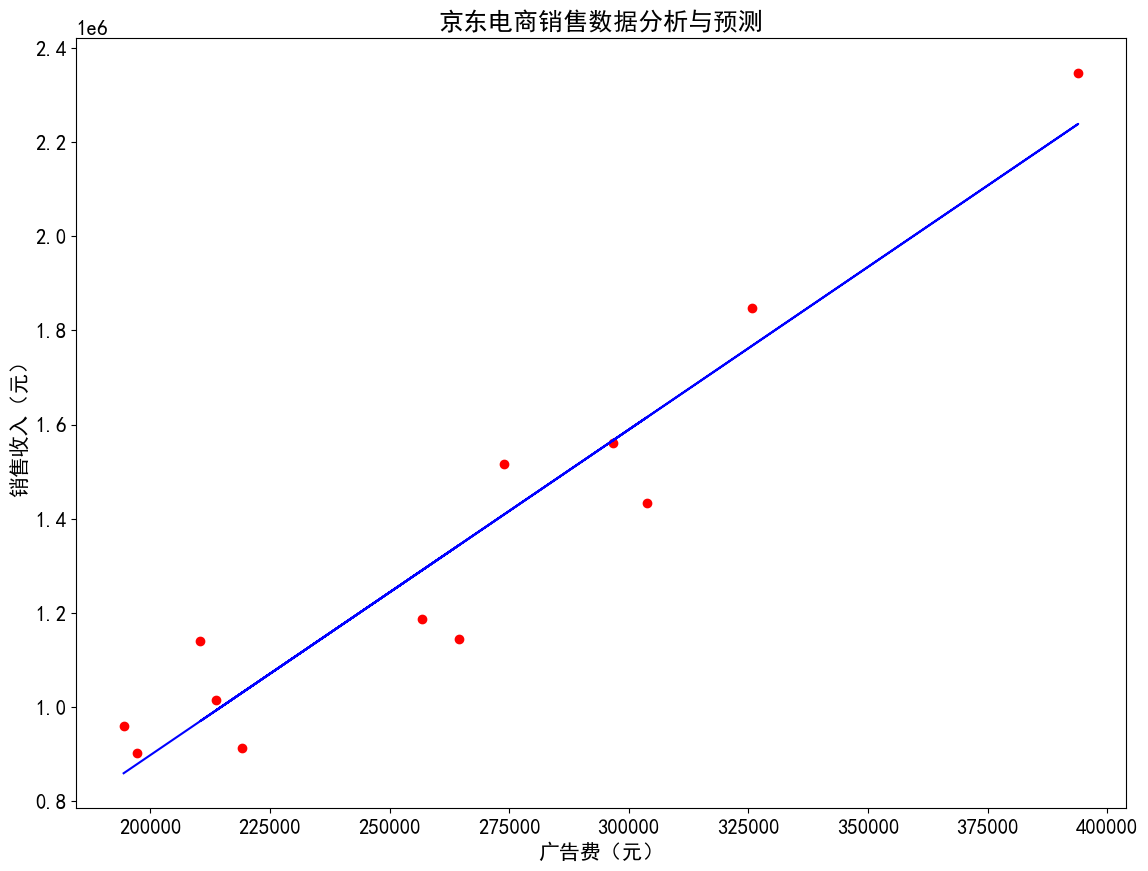

In [18]:
# 图表字体为华文细黑，字号为10
plt.rc('font', family='SimHei',size=15)
plt.figure(figsize=(15,10))
plt.title("京东电商销售数据分析与预测")
plt.scatter(x, y,color='r')                     #真实值散点图
plt.plot(x,y_pred, color='blue', linewidth=1.5) #预测回归线
plt.ylabel(u'销售收入（元）')
plt.xlabel(u'广告费（元）')
plt.subplots_adjust(left=0.2)                   #设置图表距画布左边的空白
plt.show()

In [19]:
#预测评分
from sklearn.metrics import r2_score
y_true = [360000,450000,600000,800000,920000,1300000]# 真实值
score=r2_score(y_true,y0)  # 预测评分
print(score)

0.9839200886906196


In [20]:
df= pd.read_excel('./data/sale.xlsx')
df=df[['日期','销售码洋']]
df['日期'] = pd.to_datetime(df['日期'])    #将日期转换为日期格式
df1= df.set_index('日期',drop=True)        #设置日期为索引

In [21]:
#按天统计销售数据
df_d=df1.resample('D').sum().to_period('D')
print(df_d)

               销售码洋
日期                 
2019-01-01  20673.4
2019-01-02  17748.6
2019-01-03  17992.6
2019-01-04  31944.4
2019-01-05  37875.0
...             ...
2019-12-27  34826.0
2019-12-28  35001.6
2019-12-29  39068.8
2019-12-30  38963.2
2019-12-31  42659.8

[365 rows x 1 columns]


In [22]:
#按月统计销售数据
df_m=df1.resample('M').sum().to_period('M')
print(df_m)

              销售码洋
日期                
2019-01   958763.6
2019-02   900500.2
2019-03  1144057.4
2019-04   911718.8
2019-05  1014847.8
2019-06  1515419.0
2019-07  1433418.2
2019-08  1185811.0
2019-09  1138865.0
2019-10  1848853.4
2019-11  2347063.0
2019-12  1560959.6


In [23]:
# 导出结果
df_d.to_excel('result1.xlsx')
df_m.to_excel('result2.xlsx') 
result1 = pd.read_excel('./result1.xlsx')
result2 = pd.read_excel('./result2.xlsx')
print(result1.head())
print('='*30)
print(result2.head())

          日期     销售码洋
0 2019-01-01  20673.4
1 2019-01-02  17748.6
2 2019-01-03  17992.6
3 2019-01-04  31944.4
4 2019-01-05  37875.0
          日期       销售码洋
0 2019-01-01   958763.6
1 2019-02-01   900500.2
2 2019-03-01  1144057.4
3 2019-04-01   911718.8
4 2019-05-01  1014847.8


## 1.3 分析销售收入（天、月）

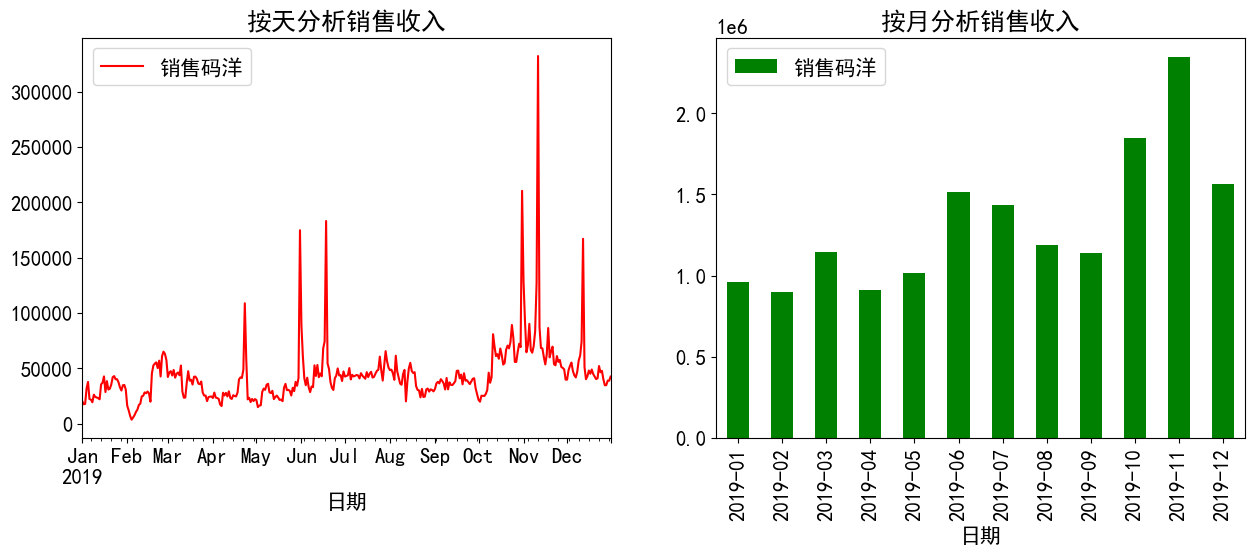

In [24]:
#图表字体为黑体，字号为10
plt.rc('font', family='SimHei',size=15)
#绘制子图
fig = plt.figure(figsize=(15,5))
ax=fig.subplots(1,2)   #创建Axes对象
#分别设置图表标题
ax[0].set_title('按天分析销售收入')
ax[1].set_title('按月分析销售收入')
df_d.plot(ax=ax[0],color='r')             #第一个图折线图
df_m.plot(kind='bar',ax=ax[1],color='g')  #第二个图柱形图
#调整图表距上部和底部的空白
plt.subplots_adjust(top=0.95,bottom=0.15)
plt.show()

In [25]:
print(df1.head())
print(df2.head())

              销售码洋
日期                
2019-01-01  3592.8
2019-01-01  2234.4
2019-01-01  1396.0
2019-01-01  1814.8
2019-01-01   597.6
              销售码洋
日期                
2019-01-01  3592.8
2019-01-01  2234.4
2019-01-01  1396.0
2019-01-01  1814.8
2019-01-01   597.6


In [26]:
df1= pd.read_excel('./data/advertisement.xlsx')
df2= pd.read_excel('./data/sale.xlsx')

In [27]:
df1['投放日期'] = pd.to_datetime(df1['投放日期'])
df1= df1.set_index('投放日期',drop=True)
df2=df2[['日期','销售码洋']]
df2['日期'] = pd.to_datetime(df2['日期'])
df2= df2.set_index('日期',drop=True)

In [28]:
# 按月统计金额
df_x=df1.resample('M').sum().to_period('M')
df_y=df2.resample('M').sum().to_period('M')

## 1.4 京东电商销售收入与广告费分析折线图

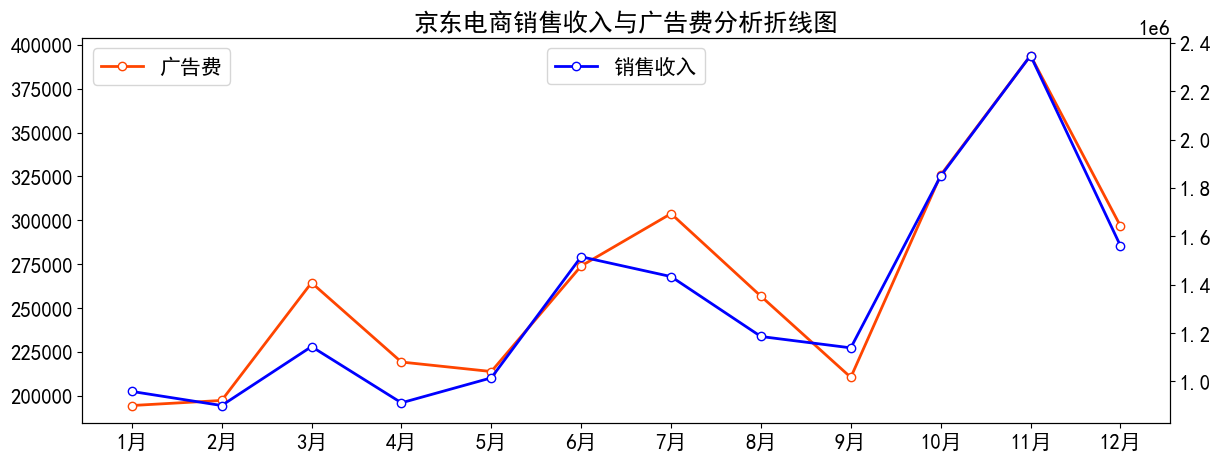

In [29]:
#x为广告费，y为销售收入
y1=pd.DataFrame(df_x['支出'])
y2=pd.DataFrame(df_y['销售码洋'])
fig = plt.figure(figsize=(15,5))# 图表字体为黑体，字号为11
plt.rc('font', family='SimHei',size=15)
ax1 = fig.add_subplot(111)                  #添加子图
plt.title('京东电商销售收入与广告费分析折线图')         #图表标题
#图表x轴标题
x=[0,1,2,3,4,5,6,7,8,9,10,11]
plt.xticks(x,['1月','2月','3月','4月','5月','6月','7月','8月','9月','10月','11月','12月'])
ax1.plot(x,y1,color='orangered',linewidth=2,linestyle='-',marker='o',mfc='w',label='广告费')
plt.legend(loc='upper left')
ax2 = ax1.twinx()                           #添加一条y轴坐标轴
ax2.plot(x,y2,color='b',linewidth=2,linestyle='-',marker='o',mfc='w',label='销售收入')
plt.subplots_adjust(right=0.85)
plt.legend(loc='upper center')
plt.show()